In [ ]:
##Libraries imported for the analysis
import pandas as pd
import glob
import os
from pathlib import Path
import pandas as pd
import numpy as np
## Libraries imported for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression

In [ ]:
##defining the path and improting the dataset
path = r'D:\data_analysis\EyeT'   
files = glob.glob(os.path.join(path, "*.csv"))     
df_each_fileS = (pd.read_csv(f) for f in files)
df   = pd.concat(df_each_fileS, ignore_index=True)

In [ ]:
df

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
0,3082,23419315,512092386,NaN,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,NaN,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
1,3083,23419315,512092386,NaN,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,NaN,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
2,3084,23426120,512099191,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
3,3085,23434449,512107520,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
4,3086,23442782,512115853,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4844299,31731,65940337,1666203561855,NaN,Participant0060,20.09.2021,Participant0060,Recording4,20.09.2021,20.09.2021,...,NaN,Fixation,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN
4844300,31732,65945534,1666203567052,Eye Tracker,Participant0060,20.09.2021,Participant0060,Recording4,20.09.2021,20.09.2021,...,NaN,Fixation,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN
4844301,31733,65953860,1666203575378,Eye Tracker,Participant0060,20.09.2021,Participant0060,Recording4,20.09.2021,20.09.2021,...,NaN,Fixation,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN
4844302,31734,65962157,1666203583675,Eye Tracker,Participant0060,20.09.2021,Participant0060,Recording4,20.09.2021,20.09.2021,...,NaN,Fixation,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN


In [ ]:
## reading head of the dataset
df.head()

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
0,3082,23419315,512092386,NaN,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,NaN,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
1,3083,23419315,512092386,NaN,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,NaN,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
2,3084,23426120,512099191,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
3,3085,23434449,512107520,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
4,3086,23442782,512115853,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN


In [ ]:
df.info()

In [ ]:
##checking the presence of null value and it's sum
df.isnull().sum()

In [ ]:
##descriptive analysis
df.describe()

,Unnamed: 0,Recording timestamp,Computer timestamp,Recording duration,Recording resolution height,Recording resolution width,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,...,Presented Media position X (DACSpx),Presented Media position Y (DACSpx),Original Media width,Original Media height,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Mouse position X,Mouse position Y
count,4.844304e+06,4.844304e+06,4.844304e+06,4.844304e+06,4844304.0,4844304.0,4.789020e+06,4.241018e+06,4.241018e+06,3.881295e+06,...,4.840684e+06,4.840684e+06,4.840684e+06,4.840684e+06,4.843551e+06,4.843551e+06,2.571146e+06,2.571146e+06,52113.000000,52113.000000
mean,9.481721e+04,5.859518e+07,6.778260e+11,1.103432e+05,1080.0,1920.0,4.747513e+09,9.135179e+02,4.532641e+02,8.470139e+02,...,2.020386e+02,-1.084277e+01,1.517771e+03,1.106384e+03,2.443453e+02,3.870550e+02,9.113709e+02,4.541373e+02,-385.692783,794.400898
std,1.084404e+05,4.183727e+07,9.456520e+11,5.010853e+04,0.0,0.0,1.306346e+10,2.956268e+02,2.935728e+02,3.007731e+02,...,1.087149e+02,1.120125e+02,6.201774e+02,4.889564e+02,5.866895e+02,5.494548e+02,2.837907e+02,2.930371e+02,442.845828,292.347874
min,3.470000e+02,2.414233e+06,5.120924e+08,1.412400e+04,1080.0,1920.0,5.040996e+07,-3.810000e+02,-2.160000e+02,-3.810000e+02,...,-7.470000e+02,-1.168000e+03,6.400000e+02,4.160000e+02,8.000000e+00,1.000000e+00,-2.890000e+02,-2.140000e+02,-1730.000000,-118.000000
25%,2.386275e+04,2.684441e+07,1.628330e+09,6.672200e+04,1080.0,1920.0,1.057263e+09,7.460000e+02,2.400000e+02,6.760000e+02,...,2.140000e+02,0.000000e+00,8.970000e+02,6.490000e+02,3.300000e+01,9.500000e+01,7.680000e+02,2.480000e+02,-504.000000,649.000000
50%,5.626000e+04,4.874914e+07,4.352990e+11,1.032830e+05,1080.0,1920.0,1.627077e+09,9.130000e+02,4.600000e+02,8.460000e+02,...,2.140000e+02,0.000000e+00,2.000000e+03,1.447000e+03,1.170000e+02,1.980000e+02,9.100000e+02,4.550000e+02,-412.000000,900.000000
75%,1.107900e+05,7.984865e+07,1.225010e+12,1.470690e+05,1080.0,1920.0,3.506508e+09,1.063000e+03,6.790000e+02,1.004000e+03,...,2.140000e+02,0.000000e+00,2.000000e+03,1.447000e+03,2.750000e+02,4.220000e+02,1.042000e+03,6.810000e+02,-255.000000,989.000000
max,5.298970e+05,2.332096e+08,4.234413e+12,2.333600e+05,1080.0,1920.0,8.072037e+10,2.304000e+03,2.374000e+03,2.304000e+03,...,4.200000e+02,0.000000e+00,3.415000e+03,3.415000e+03,1.428300e+04,5.126000e+03,2.298000e+03,2.055000e+03,1450.000000,1308.000000


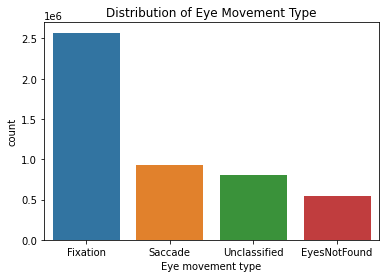

In [ ]:
##histrogram plot
sns.countplot(x='Eye movement type', data=df)
plt.title('Distribution of Eye Movement Type')
plt.show()


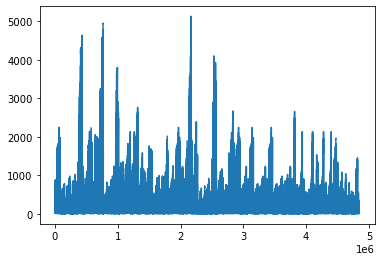

In [ ]:
plt.plot(df.index, df['Eye movement type index'])

In [ ]:
## df = df.drop(['Project name'], axis= 1)
## df = df.drop(['Timeline name'], axis= 1)
## df = df.drop(['Recording Fixation filter name'], axis= 1)
## df = df.drop(['Presented Stimulus name'], axis= 1)
## df = df.drop(['Presented Media position X (DACSpx)'], axis= 1)
## df = df.drop(['Presented Media position Y (DACSpx)'], axis= 1)
## df = df.drop(['Mouse position X'], axis= 1)
## df = df.drop(['Mouse position Y'], axis= 1)
## df = df.drop(['Gaze event duration'], axis= 1)

MemoryError: Unable to allocate 1.01 GiB for an array with shape (28, 4844304) and data type object

In [ ]:
df['Recording date UTC'] = pd.to_datetime(df['Recording date UTC'])
df.set_index('Recording date UTC', inplace=True)

In [ ]:
df.info()

In [ ]:
df['Sensor']=df['Sensor'].astype('category').cat.codes

In [ ]:
## data type conversion
df['Export date']=df['Export date'].astype('category').cat.codes
df['Participant name']=df['Participant name'].astype('category').cat.codes
df['Recording name']=df['Recording name'].astype('category').cat.codes
df['Recording date']=df['Recording date'].astype('category').cat.codes
df['Recording start time']=df['Recording start time'].astype('category').cat.codes
df['Recording start time UTC']=df['Recording start time UTC'].astype('category').cat.codes
df['Recording software version']=df['Recording software version'].astype('category').cat.codes
df['Recording monitor latency']=df['Recording monitor latency'].astype('category').cat.codes
df['Event']=df['Event'].astype('category').cat.codes
df['Event value']=df['Event value'].astype('category').cat.codes

In [ ]:
df['Presented Media name']=df['Presented Media name'].astype('category').cat.codes
df['Fixation point Y (MCSnorm)']=df['Fixation point Y (MCSnorm)'].astype('category').cat.codes
df['Fixation point X (MCSnorm)']=df['Fixation point X (MCSnorm)'].astype('category').cat.codes
df['Eye movement type']=df['Eye movement type'].astype('category').cat.codes
df['Validity left']=df['Validity left'].astype('category').cat.codes
df['Validity right']=df['Validity right'].astype('category').cat.codes
df['Recording software version']=df['Recording software version'].astype('category').cat.codes


In [ ]:
df['Recording start time']=df['Recording start time'].astype('category').cat.codes
df['Eyetracker timestamp']=df['Eyetracker timestamp'].astype('category').cat.codes
df['Gaze point Y (MCSnorm)']=df['Gaze point Y (MCSnorm)'].astype('category').cat.codes
df['Eye movement type index']=df['Eye movement type index'].astype('category').cat.codes
df['Eye movement type index']=df['Eye movement type index'].astype('category').cat.codes
df['Gaze point left X (DACSmm)']=df['Gaze point left X (DACSmm)'].astype('category').cat.codes
df['Gaze point left Y (DACSmm)']=df['Gaze point left Y (DACSmm)'].astype('category').cat.codes
df['Gaze point right X (DACSmm)']=df['Gaze point right X (DACSmm)'].astype('category').cat.codes
df['Gaze point left X (DACSmm)']=df['Gaze point left X (DACSmm)'].astype('category').cat.codes
df['Gaze point Y (MCSnorm)']=df['Gaze point Y (MCSnorm)'].astype('category').cat.codes
df['Gaze point left X (MCSnorm)']=df['Gaze point left X (MCSnorm)'].astype('category').cat.codes
df['Gaze point left Y (MCSnorm))']=df['Gaze point left Y (MCSnorm)'].astype('category').cat.codes
df['Gaze point right X (MCSnorm)']=df['Gaze point right X (MCSnorm)'].astype('category').cat.codes
df['Gaze point right Y (MCSnorm)']=df['Gaze point right Y (MCSnorm)'].astype('category').cat.codes  

In [ ]:
df.info()

In [ ]:
## column define
# col = ['Recording timestamp', 'Validity left','Validity right' ,'Sensor', 'Recording duration', 'Fixation point X (MCSnorm)', 'Fixation point Y (MCSnorm)', 'Gaze point right X (MCSnorm)', 'Gaze point right Y (MCSnorm)','Event','Eyetracker timestamp']
# X = df[col]
# y = df['Eye movement type']

MemoryError: Unable to allocate 702. MiB for an array with shape (19, 4844304) and data type float64

# Train test spliting

In [ ]:
##splitting the dataset into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Cross validation

In [ ]:
## import KFold and cross validation
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1

for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

In [ ]:
cross_validation_score = cross_val_score(linear_model.LogisticRegression(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Each fold scores: {cross_validation_score}')
print(f'The average score: {"{:.2f}".format(score.mean())}')

# Logistic regression

In [ ]:
## define the logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# RMSE Score

In [ ]:
# Calculate root mean squared error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error of dataset 2:', rmse)

# RMSE score of the dataset third

In [ ]:
# Calculate root mean squared error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error of data set 3:', rmse)

## Predictive analysis 

In [ ]:
## setting new dataframe
df_new = pd.read_csv('Questionnaire_datasetIB.csv', encoding = 'unicode_escape')

In [ ]:
df_new.head()

,Participant nr,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,...,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him or her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other peoples sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original,Elapsed time
0,1,9534500,24.09.2020 16:00,24.09.2020 16:00,Yes,Proceed,1,3,4,4,...,1,4,4,4,1,2,4,137,109,5 minutes 5 seconds
1,2,9597659,30.09.2020 15:14,30.09.2020 15:14,Yes,Proceed,2,2,4,4,...,2,4,3,3,4,2,2,127,100,5 minutes 55 seconds
2,3,9637453,01.10.2020 16:20,01.10.2020 16:20,Yes,Proceed,4,1,4,4,...,3,3,3,2,3,3,2,123,98,6 minutes 49 seconds
3,4,9732460,06.10.2020 16:45,06.10.2020 16:45,Yes,Proceed,2,3,3,3,...,2,3,4,3,2,4,2,120,95,8 minutes 39 seconds
4,5,9732853,06.10.2020 17:24,06.10.2020 17:24,Yes,Proceed,2,3,4,3,...,3,4,2,1,4,3,4,124,97,7 minutes 27 seconds


In [ ]:
## checking sum of null values
df_new.isnull().sum()

Participant nr                                                                                                                                                                            0
NR                                                                                                                                                                                        0
Created                                                                                                                                                                                   0
Modified                                                                                                                                                                                  0
I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate                                        0
I want to participate.                                      

In [ ]:
## descriptive analysis
df_new.describe()

,Participant nr,NR,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,"When I am upset at someone, I usually try to put myself in his shoes for a while.","Before criticising somebody, I try to imagine how I would feel if I was in their place.",I often get emotionally involved with my friends problems.,I am inclined to get nervous when others around me seem to be nervous.,...,I complete the sentences of other people when they find it difficult to communicate their ideas to help them.,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him or her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other peoples sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original
count,60.000000,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,30.500000,1.289288e+07,2.133333,2.616667,2.833333,2.933333,2.750000,2.900000,2.850000,2.650000,...,2.866667,2.350000,2.966667,2.866667,2.566667,2.533333,2.916667,2.850000,110.500000,85.650000
std,17.464249,2.072411e+06,0.891897,0.783120,0.994334,0.954324,1.018889,1.003384,0.879619,0.732421,...,0.947193,0.860134,0.990919,0.947193,0.945402,0.891897,0.869281,0.860134,21.611751,17.760006
min,1.000000,9.534500e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,53.000000,40.000000
25%,15.750000,1.224328e+07,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,96.500000,73.000000
50%,30.500000,1.256132e+07,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,114.500000,88.500000
75%,45.250000,1.539043e+07,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.250000,125.250000,97.250000
max,60.000000,1.601695e+07,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,151.000000,117.000000


In [ ]:
## target column define
col1 = ['Participant nr','NR','I sometimes find it difficult to see things from the other guys point of view.','I am usually objective when I watch a film or play, and I dont often get completely caught up in it.','I try to look at everybodys side of a disagreement before I make a decision.','I sometimes try to understand my friends better by imagining how things look from their perspective.','When I am upset at someone, I usually try to put myself in his shoes for a while.','Before criticising somebody, I try to imagine how I would feel if I was in their place.','I often get emotionally involved with my friends problems.','I am inclined to get nervous when others around me seem to be nervous.','People I am with have a strong influence on my mood.','It affects me very much when one of my friends seems upset.','I often get deeply involved with the feelings of a character in a film, play or novel.','I get very upset when I see someone cry.','I am happy when I am with a cheerful group and sad when the others are glum.','It worries me when others are worrying and panicky.','I can easily tell if someone else wants to enter a conversation.','I can pick up quickly if someone says one thing but means another.','It is hard for me to see why some things upset people so much.','I find it easy to put myself in somebody elses shoes.','I am good at predicting how someone will feel.','I am quick to spot when someone in a group is feeling awkward or uncomfortable.','Other people tell me I am good at understanding how they are feeling and what they are thinking.','I can easily tell if someone else is interested or bored with what I am saying.','Friends talk to me about their problems as they say that I am very understanding.','I can sense if I am intruding, even if the other person does not tell me.','I can easily work out what another person might want to talk about.','I can tell if someone is masking their true emotion.','I am good at predicting what someone will do.','I can usually appreciate the other persons viewpoint, even if I do not agree with it.','I usually stay emotionally detached when watching a film.','I always try to consider the other fellows feelings before I do something.','Before I do something I try to consider how my friends will react to it.','I feel frustrated when I cannot communicate my ideas.','I complete the sentences of other people when they find it difficult to communicate their ideas to help them.','If someone is suffering from stutter, I prefer speaking rather than texting.','I try to be patient when people speak with me very slowly.','In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.','In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him or her independently of how many students are in the class.','I feel impatient when people communicate slowly, so I complete other peoples sentences to make the communication more efficient.','I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.','I feel left out (or excluded) when I cannot participate in a conversation.','Total Score extended']
X1 = df_new[col1]
y1 = df_new['Total Score original']

In [ ]:
## train and test splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.33, random_state = 42)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          40       0.00      0.00      0.00       1.0
          52       0.00      0.00      0.00       1.0
          59       0.00      0.00      0.00       1.0
          65       0.00      0.00      0.00       1.0
          73       0.00      0.00      0.00       1.0
          78       0.00      0.00      0.00       1.0
          83       0.00      0.00      0.00       1.0
          86       0.00      0.00      0.00       1.0
          87       0.00      0.00      0.00       1.0
          89       0.00      0.00      0.00       1.0
          90       0.00      0.00      0.00       1.0
          92       0.00      0.00      0.00       1.0
          95       0.00      0.00      0.00       3.0
          97       0.00      0.00      0.00       1.0
         102       0.00      0.00      0.00       2.0
         105       0.00      0.00      0.00       1.0
         107       0.00      0.00      0.00       0.0
         109       0.00    

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error of data:', rmse)

Root Mean Squared Error of data: 28.65658737533135
